# FoodHub Project

### **Introduction**
Living in major cities can be overwhelming, but having access to reliable information about highly rated restaurants and efficient food delivery services can greatly enhance the dining experience. In response to this need, a trusted online app has emerged, offering a comprehensive database of customers and addressing the challenge of finding quality food from a variety of restaurants in New York City.


### Context & Objectives

#### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

#### Objectives

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

#### Prosposed key questions that need to be answered
- What is the minimum, maximum time, and the average time for the order to be prepared when order has been placed.
- What is the most ordered cuisine type?
- What is the average cost per meal?
- What is the busiest day of the week(Weekday/Weekend)?
- What is the average delivery time?
- What average meal preparation time?
- Restaurant with the fastest delivery time
- Restaurants with the fastest prep time
- Restaurants with the rating by cuisine



##### Data Description

This dataset contains the different data related to a food order. The following data below are the detailed information about our dataset.

##### Data(variable/colums data)

_order_id_: Unique ID genrated for each of the orders.

_customer_id_: ID of the customer who ordered the food

_restaurant_name_: Name of the restaurant

_cuisine_type_: Cuisine ordered by the customer

_cost_of_the_order_: Cost of the order

_day_of_the_week_: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

_rating_: Rating given by the customer out of 5

_food_preparation_time_: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

_delivery_time_: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

# Import tools needed for this analysis

In [1]:
#Some python libraries are required for us to perform EDA of our dataset in order to get insights.
#They can be found below

#%matplotlib inline allows graphs to be plotted after the cell block
%matplotlib inline

# import libraries for scientific computing and data manipulation
import numpy as np
import pandas as pd


# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Explore the data

In [2]:
#Let's Import our data and then view the structure

food_data = pd.read_csv("food_order.csv")

In [3]:
#check the first 5 rows in the dataset to have an idea of what our dataset looks ike, and will help us know what to
#to do with it.

food_data

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [4]:
#Lets describe our dataset to get statistical summary. These step is also important for our analysis.

food_data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [5]:
print(food_data.shape) # Utilising the 'shape' attribute to get the number of rows and colums 

(1898, 9)


In [6]:
print(food_data.columns) # Utilising the 'columns' attribute to get all the columns names 

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')


In [7]:
food_data.dtypes # Utilising the 'dtypes' attribute to get the data type of each column

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [8]:
food_data["restaurant_name"].nunique() # Utilising the 'nunique' pandas method  to count the numbers of unique resturant names within the food hub app 

178

In [9]:
#Lets get the summary or structure of our data using the info() function provided for us by pandas,
#this shows the types in each column in our dataset, total number of data colmns, and number of rows
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


###### Observation: 

From what we could see above output, there are 1898 rows and 9 columns, and different data types.
There are also 4 columns with integer data types, 4 columns with object types, and, 1 column with float type. It is also observed that the columns for order id and customer id are seen as integers, they can be converted to object type since they are for identification. We also observed that the rating column is seen as an object, while it should have been in integer because it supposed to contain numbers. This is one of the most important variable in the data, so we need to check the unique values in this column and make necessary changes.


# Data Cleaning

In [10]:
#Let's check for all the unique values in the 'rating" column
food_data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

We could see here that some datas here is "Not given"

In [11]:
#Let's replace the 'Not_given values' with 'nan'
food_data['rating'] = food_data['rating'].replace(['Not given'],np.nan)

In [12]:
#We also need to convert the data type from object to float. Note that we cannot convert
#non-finite values (NA or inf) to integer

food_data['rating'] = food_data['rating'].astype(float)

In [13]:
#Check the null value in the dataset
food_data.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

###### Observation: 

You would see that there are some orders that are not rated, we will look into this soon.

In [14]:
# Let's now convert the customer_id and order_id datas to object type as mentioned above
food_data[['customer_id','order_id']] = food_data[['customer_id','order_id']].astype(object)

In [15]:
#Checking for duplicated data in our dataset

food_data.duplicated().sum()

0

###### Observation: 

There are no duplicated data in our dataset

In [16]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


###### Observations:

We now have null values in the dataset from the rating column, because the value 'Not given' has been replaced with 'nan', we avoided replacing it with zero, because they could be confused for rating being '0'. Some data types like order id and customer id has changed and no duplicates was returned from the dataset.

In [17]:
#If we notice that the restaurant_name is not consistent, it includes different characters, we need to reconstruct
#the names or edit them, but before that let's use the unique function to see how it is.

food_data.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

###### Observation

From what we could see from above output, some names needs to be corrected because they contain some characters that makes the name to be ambiguous, so as to reduce the noise around it. We will declare the previous names, and the new names, then use a function that iterates over our arrays of string, and replace the `prev_names` with `new_names`.


In [18]:
prev_names = ["Big Wong Restaurant \x8c_¤¾Ñ¼", "Empanada Mama (closed)", "Chipotle Mexican Grill $1.99 Delivery",
              "Joe's Shanghai \x8e_À\x8eü£¾÷´", "CafÌ© China", "Dirty Bird To Go (archived)"]

In [19]:
new_names = ["Big Wong Restaurant", "Empanada Mama", "Chipotle Mexican Grill",
              "Joe's Shanghai", "Cafe China", "Dirty Bird To Go"]

In [20]:
new_names

['Big Wong Restaurant',
 'Empanada Mama',
 'Chipotle Mexican Grill',
 "Joe's Shanghai",
 'Cafe China',
 'Dirty Bird To Go']

In [21]:
replacements = dict(zip(prev_names, new_names))

# replace values in dataframe
food_data['restaurant_name'].replace(replacements, inplace=True)

This code creates a dictionary of replacements using the zip function and the `prev_names` and `new_names` lists. Finally, it uses the `replace` method of the dataframe column to replace the old names with the new names using the `inplace=True` argument to modify the column in place.

###### Note:
_The `zip()` function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together_

In [22]:
food_data.restaurant_name.unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill', 'Big Wong Restaurant',
       'Empanada Mama', 'Pylos', "Lucky's Famous Burgers", 'Shake Shack',
       'Sushi of Gari', 'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill', 'RedFarm Broadway',
       'Cafeteria', 'DuMont Burger', "Sarabeth's East",
       'Hill Country Fried Chicken', 'Bistango', "Jack's Wife Freda",
       "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Brooklyn', 'Nobu Next Door', 'Osteria Morin

###### Observation

Every previous names has been removed and replaced by new names without special characters that causes noice around the data.

In [23]:
# We need to check the data to verify the changes
food_data['restaurant_name'].nunique()

178

###### Note
In pandas, `nunique()` is a method used to count the number of unique values in a pandas object, such as a Series or DataFrame.

Moving on to the `cuisine_type`. Let's see what is going on with the cuisines, because this column is also important for our analsysis. We are also expecting to get Insights like the highest rating cuisine, the cuisine with with highest order, both for weekday and weekend, from this column. We will check the uniqueness of this, and also other necessary things.

In [24]:
food_data["cuisine_type"].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [25]:
food_data["cuisine_type"].nunique()

14

###### Observation

The `cuisine_type` column appears to be okay, no issues. There are 14 unique types of cuisine

In [26]:
food_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


In [27]:
#cheking the cost of order to check for any issues.

food_data["cost_of_the_order"].isnull().sum()

0

###### Observation

The `cost_of_the_order` is also okay. No issues.

In [28]:
#Next, we are checking the day_of_the_week of the week to chcek for any irregularities or issues


food_data["day_of_the_week"].unique()


#food_data.day_of_the_week.unique()

array(['Weekend', 'Weekday'], dtype=object)

###### Observation

Everything looks okay, no issues detected. There are only weekdays and weekend data.

In [29]:
#Checking rating column, It has been corrected from the previous code. 
#We replaced the 'Not_given values' with 'nan' and then converted the data to float from object type.

#We are going to check again just to be sure.

food_data["rating"].isnull().sum()



736

###### Observation

There are 736 unrated orders, so we don't have to fill in values into these, to avoid bias and get our potential insights wrong.

In [30]:
food_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


# Exploratory Data Analysis (EDA)

Now we want to do some statiscal analysis. This step is an important part of data analysis because it helps to uncover patterns, trends, and relationships within data, this also help to draw meaningful insights and conclusions from data and make informed decisions.

In [31]:
#We need to check the minimum, maximum time, and average time for the order to be prepared when order has been placed,
#Using the describe method on `food_preparation_time`

food_data.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1162.000000,1898.000000,1898.000000
mean,16.498851,4.344234,27.371970,24.161749
std,7.483812,0.741478,4.632481,4.972637
min,4.470000,3.000000,20.000000,15.000000
25%,12.080000,4.000000,23.000000,20.000000
50%,14.140000,5.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


### Observations from Descriptive Statistics:

1. order_id & customer_id: These are just identifiers, so their descriptive statistics are not of primary interest.

2. cost_of_the_order: The average cost of an order is approximately $16.50. The orders range from a minimum of $4.47 to a maximum of $35.41. Half of the orders are below $14.14, indicating that most orders are on the lower cost side.

3. rating: Out of the available ratings (excluding NaN values), the mean rating is approximately 4.34, which is relatively high. This suggests that most customers are satisfied with their orders. Ratings range from 3 to 5.

4. food_preparation_time: On average, it takes about 27.37 minutes to prepare food. The preparation time varies between 20 and 35 minutes.

5. delivery_time: The average delivery time is roughly 24.16 minutes. Delivery times range from 15 to 33 minutes.delivery_time: The average delivery time is roughly 24.16 minutes. Delivery times range from 15 to 33 minutes.delivery_time: The average delivery time is roughly 24.16 minutes. Delivery times range from 15 to 33 minutes.


In [32]:
#Let's now focus on the food_preparation_time

food_data["food_preparation_time"].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

###### Observationion 

From the above output, we could see that:

`The average time for
food preparation is 27 mins`

`Minimum time, the shortest time is 20 mins`

`Lastly, the maximum time which is like the longest is 35 minutes.`

In [33]:
#To confirm what we just did

print("Average")

ave = food_data["food_preparation_time"].mean().round(0).astype(int)
print(f'{ave} mins')


Average
27 mins


In [34]:
print("Minimum Num")
mini = food_data["food_preparation_time"].min()
print(f'{mini} mins')

Minimum Num
20 mins


In [35]:
print("Maximum Num")
maxi = food_data["food_preparation_time"].max()
print(f'{maxi} mins')

Maximum Num
35 mins


In [36]:
food_data["delivery_time"].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observation

This analysis shows that there were a total of 1898 observations and the average delivery time is approximately 24.16mins, with a standard deviation of 4.97, indicating that the values are somewhat spread out from the mean. The minimum delivery time recorded was 15mins, and the longest delivery time was 33mins. 50% of the orders was delivered in 25mins, and 75% was delivered in 28mins, indicating that 50% of the observations were between 20mins and 25mins, and 75% of the observations were below 28mins

In [37]:
food_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


For every resaurant what is the average delivery time

In [38]:
# Utilising`groupby` pandas method to display the average delivery time of each resurant.
avg_del_time = food_data.groupby('restaurant_name')['delivery_time'].mean()

In [39]:
avg_del_time

restaurant_name
'wichcraft          28.000000
12 Chairs           27.750000
5 Napkin Burger     24.400000
67 Burger           28.000000
Alidoro             22.000000
                      ...    
Zero Otto Nove      21.500000
brgr                25.000000
da Umberto          28.000000
ilili Restaurant    24.888889
indikitch           25.500000
Name: delivery_time, Length: 178, dtype: float64

In [40]:
# Utilising`groupby` pandas method to display the average preparation time of each resurant.
avg_food_prep_time = food_data.groupby('restaurant_name')['food_preparation_time'].mean()

In [41]:
avg_food_prep_time

restaurant_name
'wichcraft          28.000000
12 Chairs           27.000000
5 Napkin Burger     30.200000
67 Burger           20.000000
Alidoro             34.000000
                      ...    
Zero Otto Nove      30.000000
brgr                25.000000
da Umberto          24.333333
ilili Restaurant    26.388889
indikitch           30.750000
Name: food_preparation_time, Length: 178, dtype: float64

In [42]:
#Let's check the counts of the cuisine types, and arrange them in descending order.


food_data["cuisine_type"].value_counts().reset_index().rename(columns={"index": "cuisine_type", "cuisine_type": "count"})

food_data["cuisine_type"].value_counts().reset_index().rename(columns={"index": "cuisine_type", "cuisine_type": "count"}).sort_values(by="count", ascending=False)



,cuisine_type,count
0,American,584
1,Japanese,470
2,Italian,298
3,Chinese,215
4,Mexican,77
5,Indian,73
6,Middle Eastern,49
7,Mediterranean,46
8,Thai,19
9,French,18


###### The cost of orders increases with higher food preparation times in New York City

In [43]:
# Calculate the correlation coefficient between cost_of_the_order and food_preparation_time
correlation = food_data['cost_of_the_order'].corr(food_data['food_preparation_time'])

In [44]:
# Check if the correlation is positive, indicating that the cost increases with higher food preparation times
if correlation > 0:
    print("The cost of orders increases with higher food preparation times.")
else:
    print("There is no clear relationship between the cost of orders and food preparation times.")

The cost of orders increases with higher food preparation times.


### Number of Restaurants by Cuisine Type

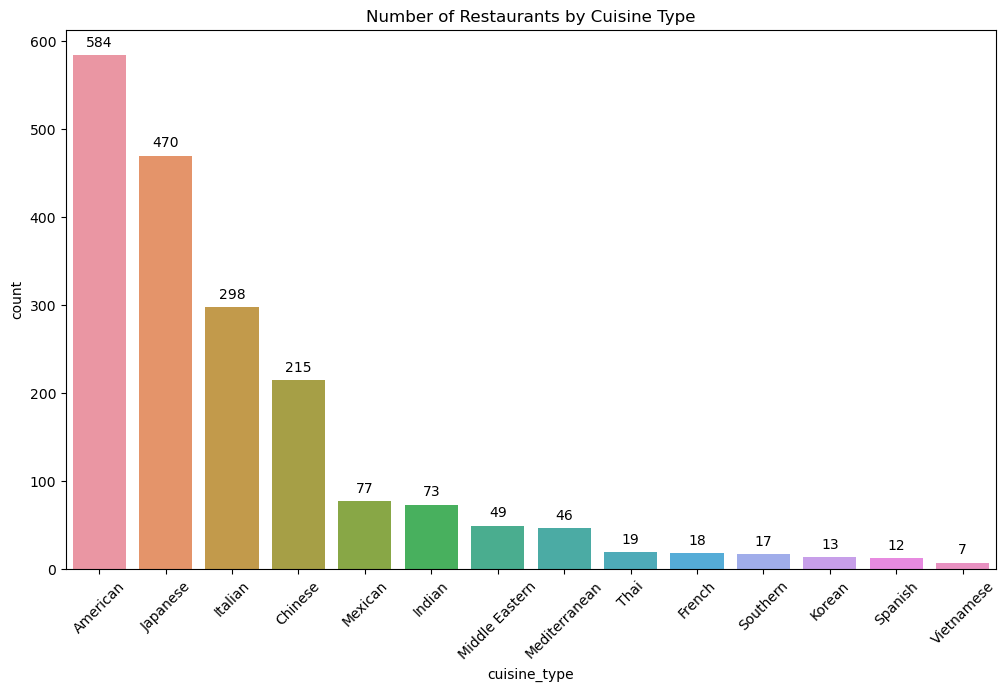

In [45]:
#Let's explore the variables, check the distributions, and make observations using histograms,
#boxplots, countplots, and so on)

#sns.histplot(data = food_data, x ='cuisine_type').set(title='The cuisine types');
#plt.xticks(rotation=90);

plt.figure(figsize = (12,7))
sns.countplot(data = food_data, x = 'cuisine_type', order = food_data['cuisine_type'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('Number of Restaurants by Cuisine Type')

# Add text labels to each bar
for i, v in enumerate(food_data['cuisine_type'].value_counts()):
    plt.annotate(str(v), xy = (i, v + 10), ha = 'center', fontsize = 10)

plt.show()

### Observation from Cuisine Type Distribution:

1. American cuisine has the highest number of orders, making it the most popular choice among customers.

2. Japanese, Italian, and Mexican cuisines also have a significant number of orders, suggesting their popularity.

3. On the other hand, cuisines like Thai, French, Southern, Korean, Spanish and Vietnamese have relatively fewer orders.

### Cost of Order

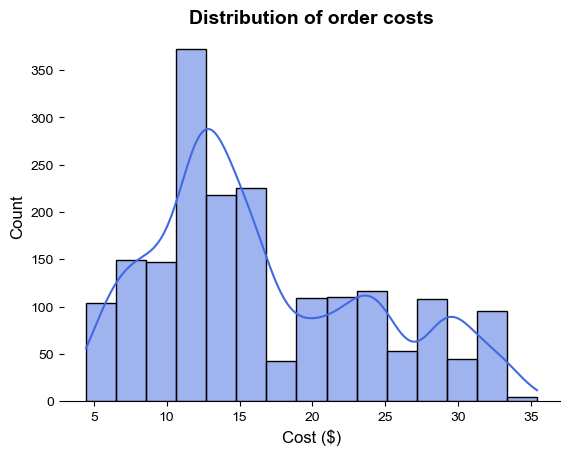

In [46]:
sns.histplot(data=food_data, x='cost_of_the_order', bins=15, kde=True, color='royalblue')
sns.set_style('whitegrid')
sns.despine(left=True)

plt.title('Distribution of order costs', fontsize=14, fontweight='bold')
plt.xlabel('Cost ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()



### Average Cost per meal

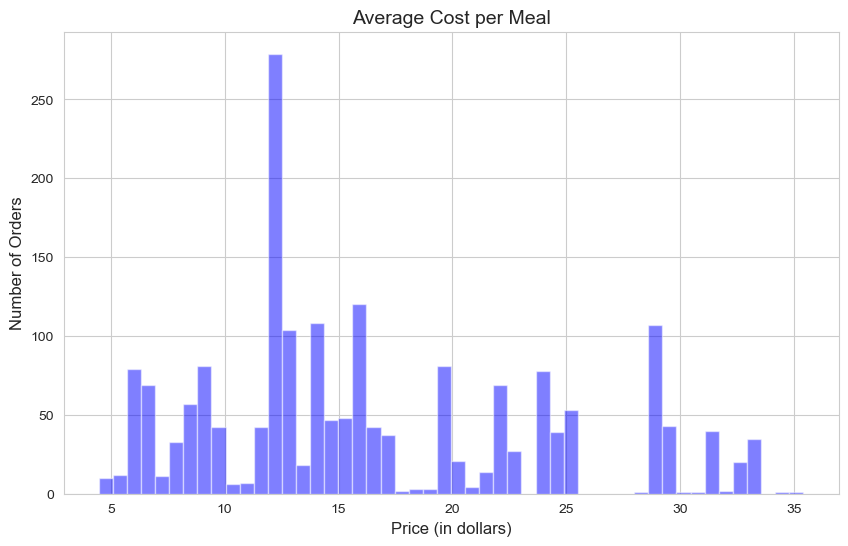

In [47]:
#Average Cost per Meal: 

plt.figure(figsize=(10,6))
plt.hist(food_data['cost_of_the_order'], bins=50, color='blue', alpha=0.5)
plt.title('Average Cost per Meal', fontsize=14)
plt.xlabel('Price (in dollars)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

This code generates a histogram plot of the 'cost_of_the_order' column, representing the average cost per meal. The x-axis shows the price in dollars, and the y-axis represents the number of orders at each price range. The plot provides insights into the distribution of order costs and can help identify the most common price ranges.

### Boxplot of Cost of Orders

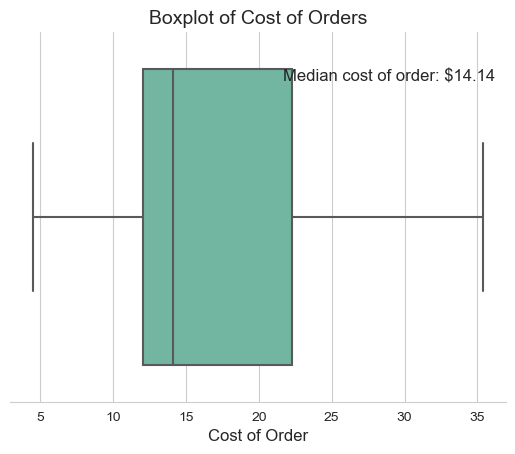

In [48]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

sns.boxplot(data=food_data, x='cost_of_the_order')
sns.despine(left=True)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('Cost of Order', fontsize=12)
plt.title('Boxplot of Cost of Orders', fontsize=14)

# Adding reading on top of the boxplot
median = food_data['cost_of_the_order'].median()
plt.text(0.55, 0.9, f"Median cost of order: ${median:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()



### Average Delivery Time

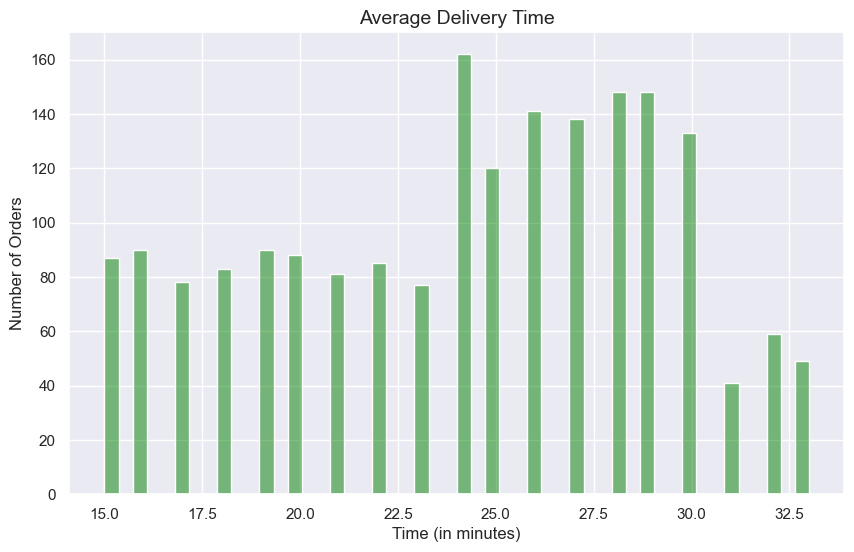

In [49]:
#Average Delivery Time:
sns.set_palette("Paired")
plt.figure(figsize=(10, 6))
sns.histplot(data=food_data, x='delivery_time', bins=50, color='green', alpha=0.5)
plt.title('Average Delivery Time', fontsize=14)
plt.xlabel('Time (in minutes)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

### Boxplot of Average Delivery Time

Text(0.5, 1.0, 'Boxplot of Delivery Time')

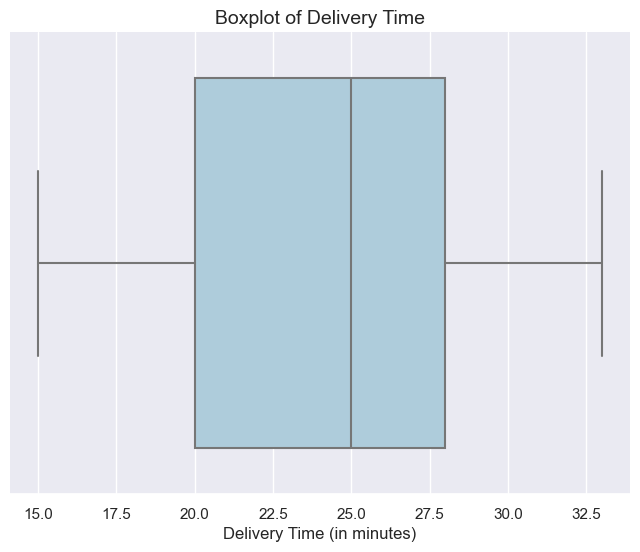

In [50]:
sns.boxplot(data=food_data, x='delivery_time')
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.despine(left=True)
plt.xlabel('Delivery Time (in minutes)', fontsize=12)
plt.title('Boxplot of Delivery Time', fontsize=14)

### Distribution of food preparation time

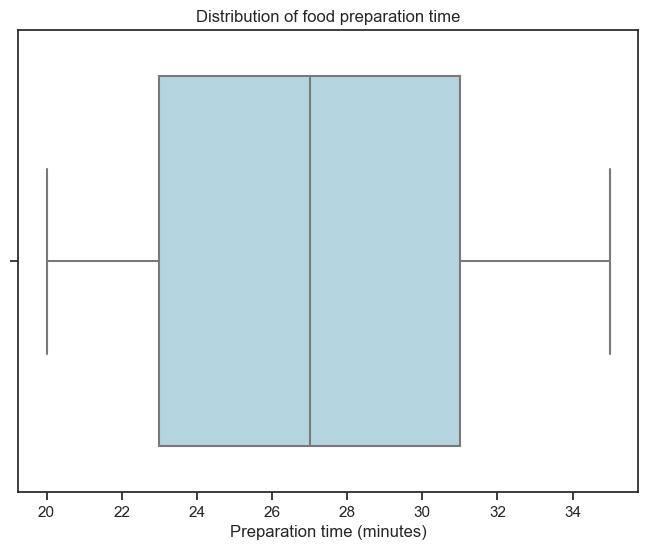

In [51]:
sns.set(style='ticks')

# Set plot size
fig, ax = plt.subplots(figsize=(8, 6))

# Create box plot
sns.boxplot(data=food_data, x='food_preparation_time', color='lightblue', ax=ax)

# Set title and axis labels
ax.set(title='Distribution of food preparation time', xlabel='Preparation time (minutes)')

plt.show()

### Distribution of Restaurant Ratings

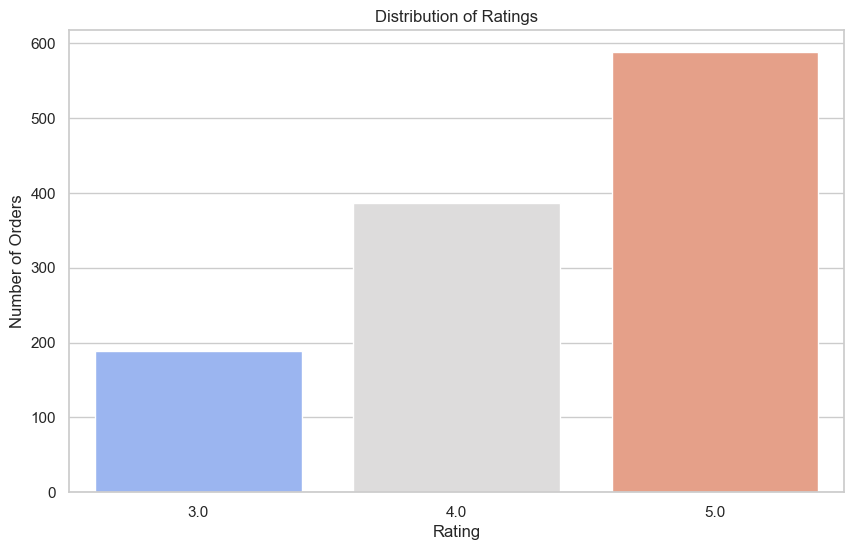

In [52]:
# Set up the aesthetics
sns.set_style("whitegrid")

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=food_data, x='rating', palette="coolwarm")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

#### Observation from Rating Distribution:

1. The majority of customers gave a rating of 5, indicating high satisfaction with their orders.
2. Ratings of 3 and 4 are less frequent in comparison, with a rating of 3 being the least common.
3. This positive skewness towards higher ratings suggests that most customers are generally satisfied with the service and food quality they receive.


### Top 10 Restaurants by Order Count

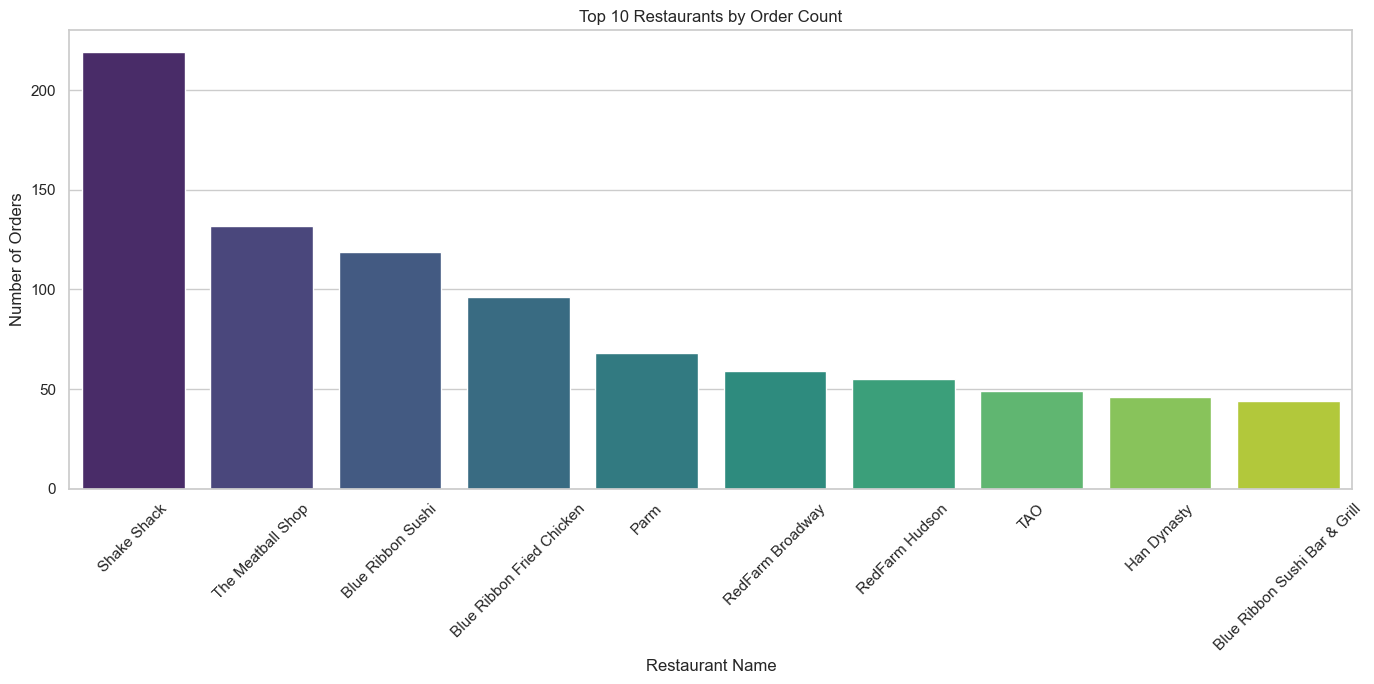

In [53]:
# Get the top 10 restaurants by order count
top_restaurants = food_data['restaurant_name'].value_counts().head(10)

# Plot the top 10 restaurants by order count
plt.figure(figsize=(14, 7))
sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette="viridis")
plt.title('Top 10 Restaurants by Order Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Observation from Top Restaurants Analysis

1. `"Shake Shack"` is the most popular restaurant based on the number of orders, followed closely by `"The Meatball Shop"`

2. The top restaurants have a noticeably higher order count than the others in the top 10 list.

### Busiest Day of the Week

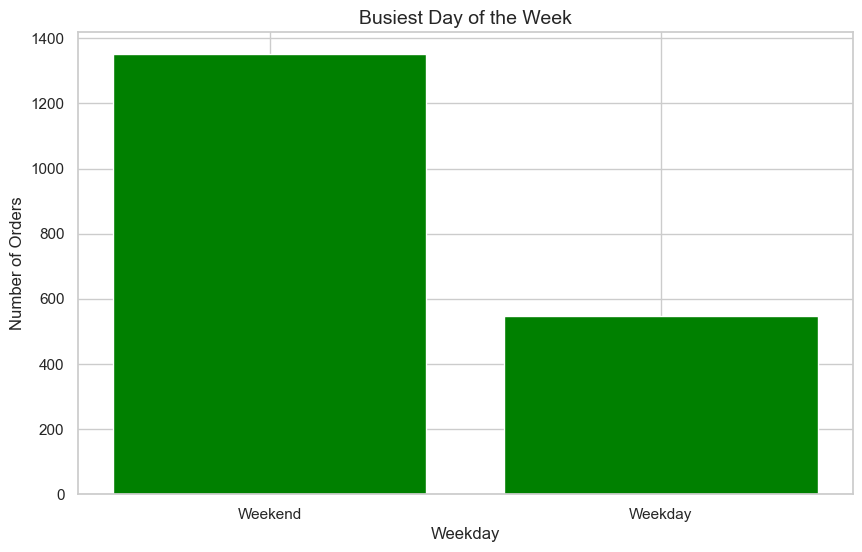

In [54]:
#Busiest Day of the Week:
weekday_counts = food_data['day_of_the_week'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(weekday_counts.index, weekday_counts.values, color='green')
plt.title('Busiest Day of the Week', fontsize=14)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.show()

### Orders per cuisine type by day of the week

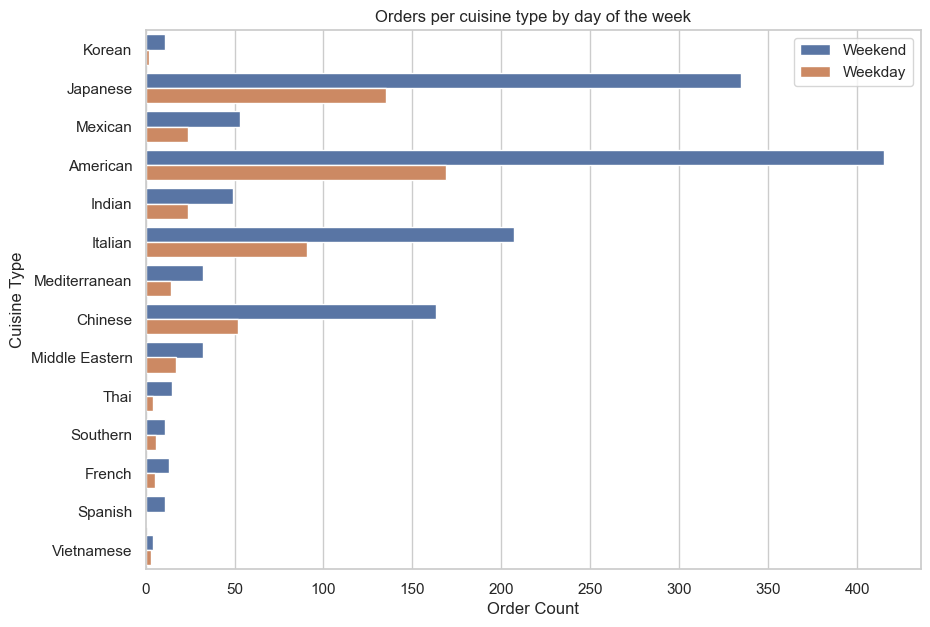

In [55]:
# Creating a bar chart to show the distribution of cuisine type
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=food_data, y='cuisine_type', hue='day_of_the_week')
plt.xlabel('Order Count')
plt.ylabel('Cuisine Type')
plt.title('Orders per cuisine type by day of the week')
plt.legend(loc='upper right')

# Add text labels to each bar
for i, v in enumerate(food_data['cuisine_type'].value_counts()):
    plt.annotate(str(v), xy = (i, v + 10), ha = 'center', fontsize = 10)
plt.show()

### Observation

According to our analysis, American cuisine is the most popular dish duriung the weekend.

### Percentage of Restaurants by Rating

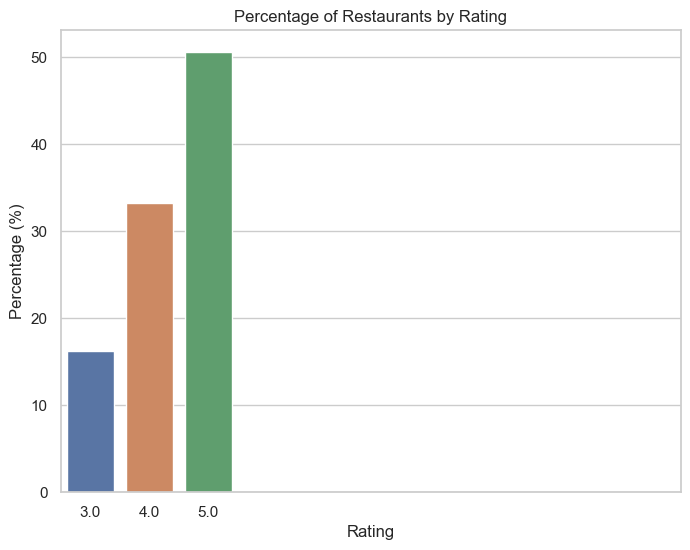

In [56]:
rating_percentages = food_data['rating'].value_counts(normalize=True).sort_index() * 100

# plot rating against percentage
sns.barplot(x=rating_percentages.index, y=rating_percentages.values)
plt.xlabel('Rating')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Restaurants by Rating')
plt.xticks(np.arange(0, 11, 1))
plt.show()

#sns.boxplot(data=food_data,x='rating');

Plotting pandax boxplots from the dataframe to identify outliers 
1. Utilising the figsize keyword argument to set the sizes of the figures. the default size might be too samll and not format very well 
2. Utilising the subplots keyword to set whether the plots are plotted as seperate subplots or on the same plot 

In [57]:
# We need to Create a list of column names to exclude because we don't need some certain variables
columns_to_exclude = ["order_id", "customer_id"]

In [58]:
# Let's create a new DataFrame without the excluded columns
food_data_subset = food_data.drop(columns=columns_to_exclude)

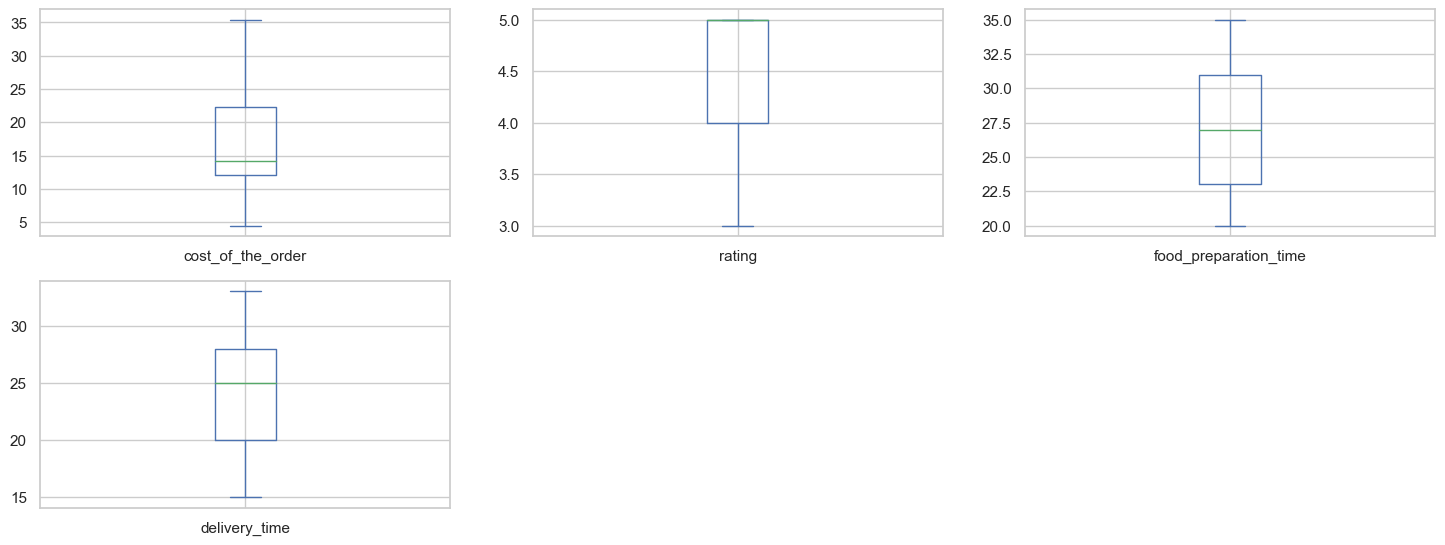

In [59]:
# Let's plot the subsetted DataFrame
food_data_subset.plot(kind="box", subplots=True, layout=(3, 3), figsize=(18, 10))

# Display the plot
plt.show()

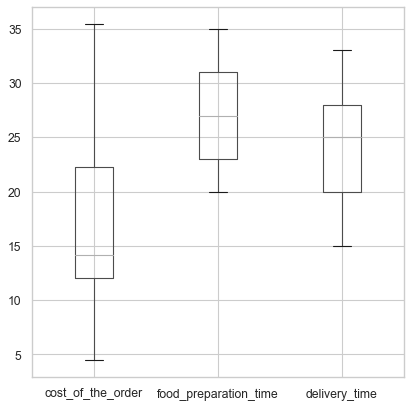

In [60]:
#Plotting 3 boxploys on the same graph for the Cost of the order, food preparation time and delivery time cloumns

#The boxplot visually represents the distribution of these variables, showcasing their median, quartiles, and any outliers.
fig = plt.figure(figsize=(6,6), dpi=80, facecolor="w",edgecolor="k") 

# Splitting the box by three, one for cost of order, Food Preparation time and food delivery time 
boxplot = food_data.boxplot(column =["cost_of_the_order","food_preparation_time","delivery_time"]) 

In [61]:
#Day of the week have been spelt correctly
print(food_data["rating"].unique())

[nan  5.  3.  4.]


In [62]:
# calculate percentage of occurrence for each value in the column
percentage_rating_occurance = food_data["rating"].value_counts(normalize=True, dropna=False)*100
print(percentage_rating_occurance)

NaN    38.777661
5.0    30.979979
4.0    20.337197
3.0     9.905163
Name: rating, dtype: float64


### Rating percentage distribution using Pie Chart

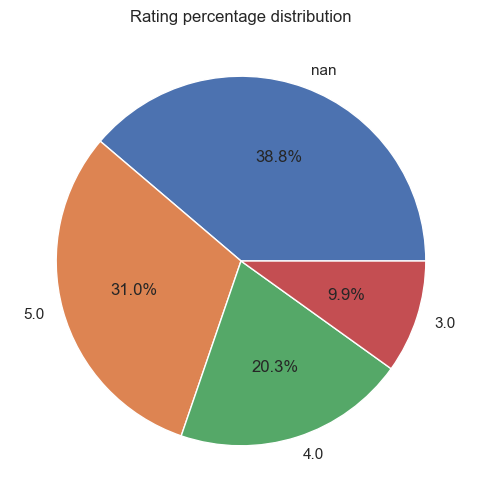

In [63]:
# Create a pie chart with the percentages as the labels
plt.pie(percentage_rating_occurance.values,labels=percentage_rating_occurance.index,autopct='%1.1f%%')
plt.title("Rating percentage distribution")
plt.show()

An Attempt to visualize the relationship betweent cost of order and waiting time for each cuisne type but the result was no clear 

**I want to investigate the relationship between the cost of the order, food preparation time, delivery time, and ratings.** 

**I will use scatter plots and correlation matrices to visualize these relationships.**

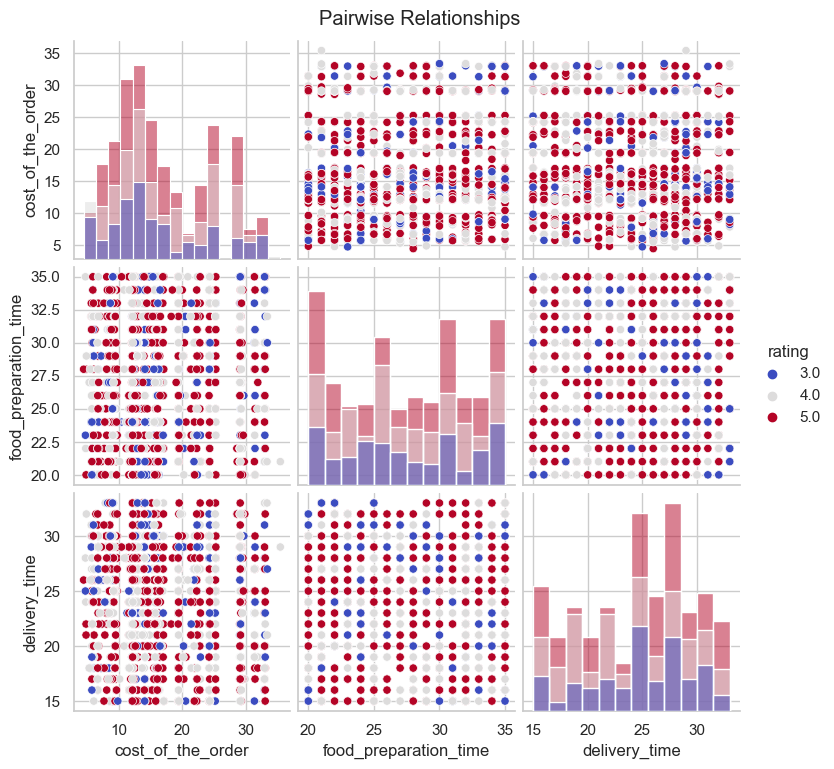

In [64]:
# Plot pairwise relationships between numerical columns
pairwise_plot = sns.pairplot(food_data[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']], 
                             hue='rating', palette='coolwarm', diag_kind='hist')
pairwise_plot.fig.suptitle("Pairwise Relationships", y=1.02)
plt.show()


### Observations from Pairwise Relationships

1. Cost vs. Rating: There doesn't appear to be a clear linear relationship between the cost of the order and the rating. This suggests that the cost might not be the primary factor influencing customer satisfaction.

2. Food Preparation Time vs. Rating: Similarly, food preparation time doesn't seem to have a strong linear relationship with ratings. This implies that as long as the preparation time is within a reasonable range, it might not significantly impact the rating.

3. Delivery Time vs. Rating: A slight trend can be observed where higher delivery times might be associated with lower ratings. However, the relationship is not very strong.

### Correlation Matrix

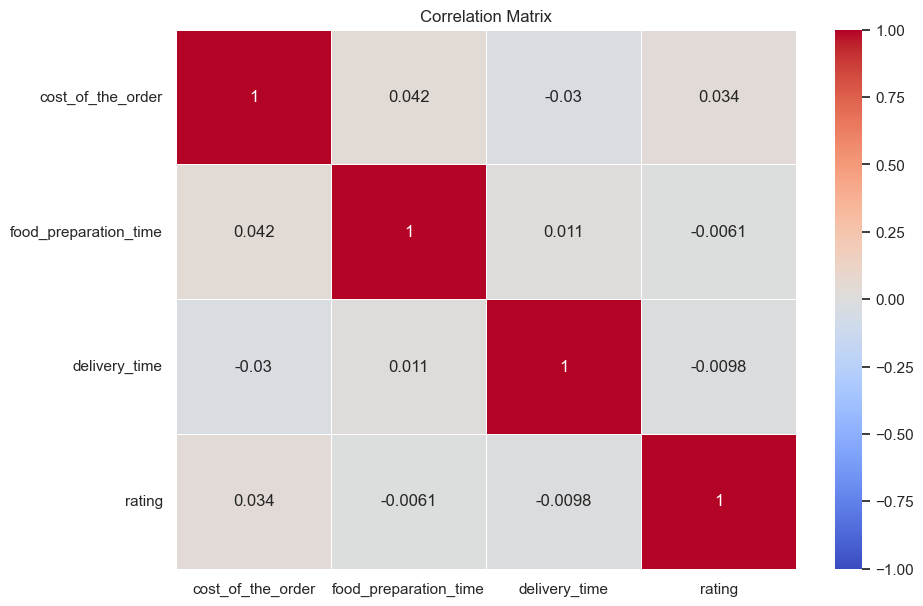

In [65]:
# Compute the correlation matrix
correlation_matrix = food_data[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr(numeric_only=True)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Correlation Matrix: 

The correlation values confirm our observations. The correlations between the rating and other factors (cost, food preparation time, delivery time) are relatively low, suggesting that these factors independently might not have a strong influence on the rating.


In [66]:
food_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


### Average Cost by Cuisine Type

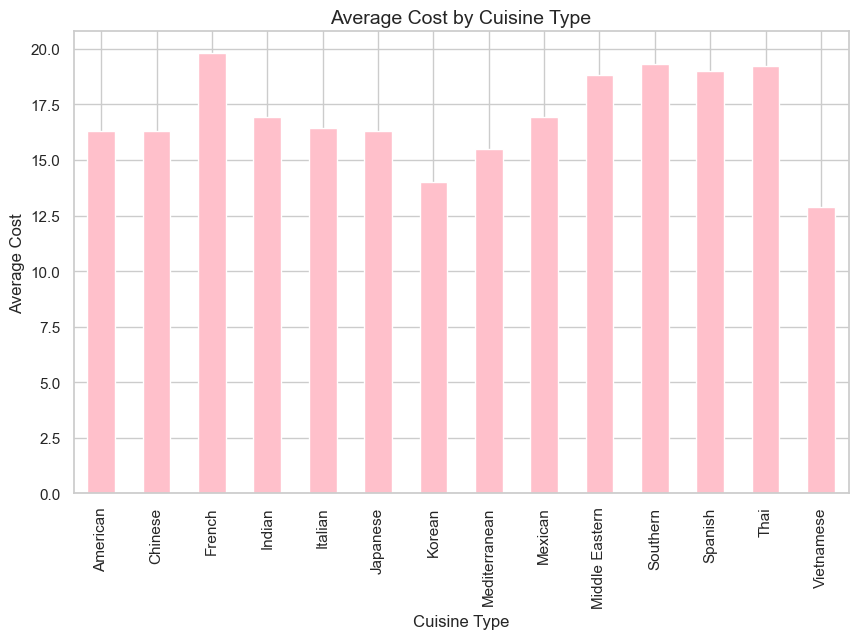

In [67]:
# Convert the 'cuisine_type' column to a string type
food_data['cuisine_type'] = food_data['cuisine_type'].astype(str)

# Group the data by cuisine_type and calculate the mean of cost_of_the_order for each cuisine type
cost_by_cuisine = food_data.groupby('cuisine_type')['cost_of_the_order'].mean()

# Create a bar chart of the average cost by cuisine type
ax = cost_by_cuisine.plot.bar(figsize=(10, 6), color='pink')

# Set the title and labels for the chart
ax.set_title('Average Cost by Cuisine Type', fontsize=14)
ax.set_xlabel('Cuisine Type', fontsize=12)
ax.set_ylabel('Average Cost', fontsize=12)

# Display the chart
plt.show()

In [68]:
# calculate percentage distribution of cuisine types
cuisine_pct = food_data['cuisine_type'].value_counts(normalize=True) * 100

# round the percentages to 2 decimal places
cuisine_pct = cuisine_pct.round(2)

# sort the results in descending order
cuisine_pct = cuisine_pct.sort_values(ascending=False)

print(cuisine_pct)

American          30.77
Japanese          24.76
Italian           15.70
Chinese           11.33
Mexican            4.06
Indian             3.85
Middle Eastern     2.58
Mediterranean      2.42
Thai               1.00
French             0.95
Southern           0.90
Korean             0.68
Spanish            0.63
Vietnamese         0.37
Name: cuisine_type, dtype: float64


The resulting plot shows the top 10 restaurants with the fastest average delivery time, with each restaurant represented by a bar whose height corresponds to its average delivery time. This plot helps visualize and compare the delivery times of different restaurants, allowing you to easily identify the restaurants with the fastest delivery service.

In [69]:
np.percentile(food_data["delivery_time"], 75, keepdims=False)

28.0

This code above calculates the `75th(75%) percentile` of the delivery time variable in the `"food_data"` dataset using the numpy library.

"percentile" is a function from numpy that calculates the value at a given percentile of a dataset.
`"food_data['delivery_time']"` specifies the delivery time variable in the "food_data" dataset. `"75"` specifies the desired percentile to calculate.

`"keepdims=False"` specifies that the output should not have the same dimensionality as the input data.

Therefore, 28 minutes is the delivery time for 75% of the orders after the food has been prepared.


#### Observations

- Cuisine Type -> Based on the analysis of our data, American cuisine (30.77%) seems to be the most preferred, followed by Japanese cuisine (24.76%) in second place. Italian cuisine (15.70%) is ranked third, while Vietnamese cuisine (0.37%) appears to be the least frequently ordered. The most commonly ordered cuisine types are American, Japanese, Italian, Chinese, and Mexican.
----------------------------------------------------------------------------------------------------------------------

- Orders per cuisine type by day of the week was also analysed, distributing cuisine by weekday and weekend. American cuisine has the highest order on the weekend and weekday. Orders on weekends more than weekday. The reasons could contribute to this.

----------------------------------------------------------------------------------------------------------------------

- Cost of Order -> After analyzing the cost of orders in the data set, it was found that the majority of the orders fell in the range of 12-23 dollars. The minimum cost for an order was around 4 dollars, while the maximum cost was 35 dollars. We also observed that the dataset did not contain any outliers. Furthermore, the histogram indicates that orders with a total cost of 13 dollars were the most popular.

----------------------------------------------------------------------------------------------------------------------

- Delivery Time -> 28 minutes is the delivery time for 75% of the orders after the food has been prepared.
----------------------------------------------------------------------------------------------------------------------

- Ratings -> The distribution of restaurant ratings is skewed to the right with the majority of ratings falling between 4.0 and 5.0. 5.0 being the highest rating. There are very few ratings below 4.0, indicating that customers generally rate restaurants positively.

----------------------------------------------------------------------------------------------------------------------

- Days of the week -> The data suggests that there is a higher number of orders during weekends compared to weekdays. However, it is difficult to plot the order count for each customer ID as there are numerous IDs. Nonetheless, we can observe the order counts among different customers in a general sense.

----------------------------------------------------------------------------------------------------------------------

Restaurant with the fastest delivery time,
Restaurants with the fastest prep time,
Restaurants with the rating by cuisine

We need to answer some other questions too, in order to solve the complete business problem.

### What are the names of the 5 top performing restaurants based on the total number of orders they received?

In [70]:
top_5_restaurants = food_data['restaurant_name'].value_counts().head(5)

In [71]:
top_5_restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observation

Based on the analysis, Shake Shack has the highest number of orders received among the top 5 restaurants with 219 orders, followed by The Meatball Shop with 132 orders, and Blue Ribbon Sushi with 119 orders. The remaining two restaurants in the top 5, Blue Ribbon Fried Chicken and Parm, had 96 and 89 orders respectively. 

The data suggests that Shake Shack is the most popular among the top 5 restaurants, with a significantly higher number of orders than the rest.

### Who are the most loyal customers with the highest number of orders

In [72]:
#We need to identify top 5 customers as we've done for top performing restaurants. 
#These customers should sometimes be rewarded for the loyalty. We look at the number of times they've ordered food
#from the restaurants.

food_data.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head()



customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
Name: order_id, dtype: int64

### What is the total number of orders by cuisine for Weekday & Weekend?

In [73]:
#We need to check the total number of orders by cuisine for Weekday & Weekend, this is done just to confirm our earlier
#analysis. 

food_data.groupby('day_of_the_week')['cuisine_type'].count().sort_values(ascending=False).head()

day_of_the_week
Weekend    1351
Weekday     547
Name: cuisine_type, dtype: int64

##### Observation

There are more orders during the Weekend than in the weekday. 

### What are the total number of ratings given after the order?

In [74]:
#This is for getting the total number of rating given after the order.

food_data.groupby('rating')['customer_id'].count().sort_values(ascending=False).head()

rating
5.0    588
4.0    386
3.0    188
Name: customer_id, dtype: int64

### What is the average cost/dollars customers spend in a given restaurant?

In [75]:
#To get the average cost/dollars customers spend in a given restaurant

food_data.groupby('restaurant_name')['cost_of_the_order'].mean().sort_values(ascending=False)

restaurant_name
Kambi Ramen House         32.930
Emporio                   31.430
Bhatti Indian Grill       31.115
Haru Gramercy Park        29.830
Lucky Strike              29.250
                           ...  
Market Table               6.790
Wa Jeal                    6.740
Cipriani Le Specialita     5.920
Big Wong Restaurant        5.920
Hunan Manor                5.720
Name: cost_of_the_order, Length: 178, dtype: float64

### What are the ratings of restaurants by cuisine type?

In [76]:
#food_data.groupby('cuisine_type')['rating'].sort_values(ascending=False)

ratings_by_cuisine = food_data.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)

In [77]:
ratings_by_cuisine

cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64

### Which restaurant has the fastest preparation time?

In [78]:
#fastest_prep_time = food_data.groupby('restaurant_name')['food_preparation_time'].min().reset_index()

In [79]:
#fastest_prep_time_restaurant = food_data[['restaurant_name', 'food_preparation_time']].nsmallest(1, 'food_preparation_time')['restaurant_name'].iloc[0]

fastest_restaurant = food_data.nsmallest(1, 'food_preparation_time')
print(f"The restaurant that has the fastest preparation time is {fastest_restaurant['restaurant_name'].iloc[0]}")
print(f"It took {fastest_restaurant['food_preparation_time'].iloc[0]} minutes to prepare the food.")



The restaurant that has the fastest preparation time is Tamarind TriBeCa
It took 20 minutes to prepare the food.


#### Observation

The fastest restaurant is `Tamarind TriBeCa` and it took `20 minutes` to prepare the food.

### Which restaurant has the fastest delivery time?

In [80]:
fastest_delivery_time = food_data.nsmallest(1, 'delivery_time')
print(f"The restaurant with the fastest delivery time is {fastest_delivery_time['restaurant_name'].iloc[0]}")
print(f"It took {fastest_delivery_time['delivery_time'].iloc[0]} minutes to deliver the food.")

The restaurant with the fastest delivery time is Blue Ribbon Fried Chicken
It took 15 minutes to deliver the food.


#### Observation

The restaurant with the fastest delivery time is `Blue Ribbon Fried Chicken`, and It took them `15 minutes` to deliver the food.

In [81]:
#We need to find some relations between the variable in our dataset. First, let's create the total time taken to deliver
#the meal, from the point of preparation to delivery.

food_data['total_order_time'] = food_data['delivery_time'] + food_data['food_preparation_time']
food_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_order_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


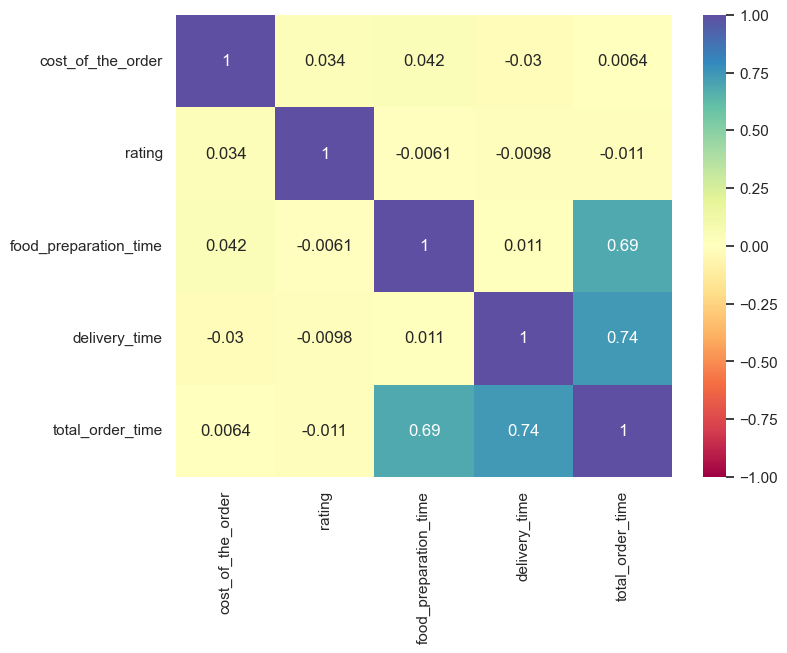

In [82]:
#using a color map specified as 'Spectral'. Additionally, the values for the vmin and 
#vmax parameters are set to -1 and 1, respectively, to ensure the color range spans from -1 to 1.

sns.heatmap(food_data.corr(numeric_only=True), annot=True, cmap='Spectral', vmin=-1, vmax=1);

#### Observation

The heatmap above displays the correlation matrix of the numeric columns in the food_data DataFrame.
In relation to our analysis, it is apparent that there is a strong positive correlation between total time and delivery time, as well as between total time and order preparation time. An increase in the order preparation time results in a corresponding increase in the total time. Similarly, an increase in delivery time leads to an increase in the total time.

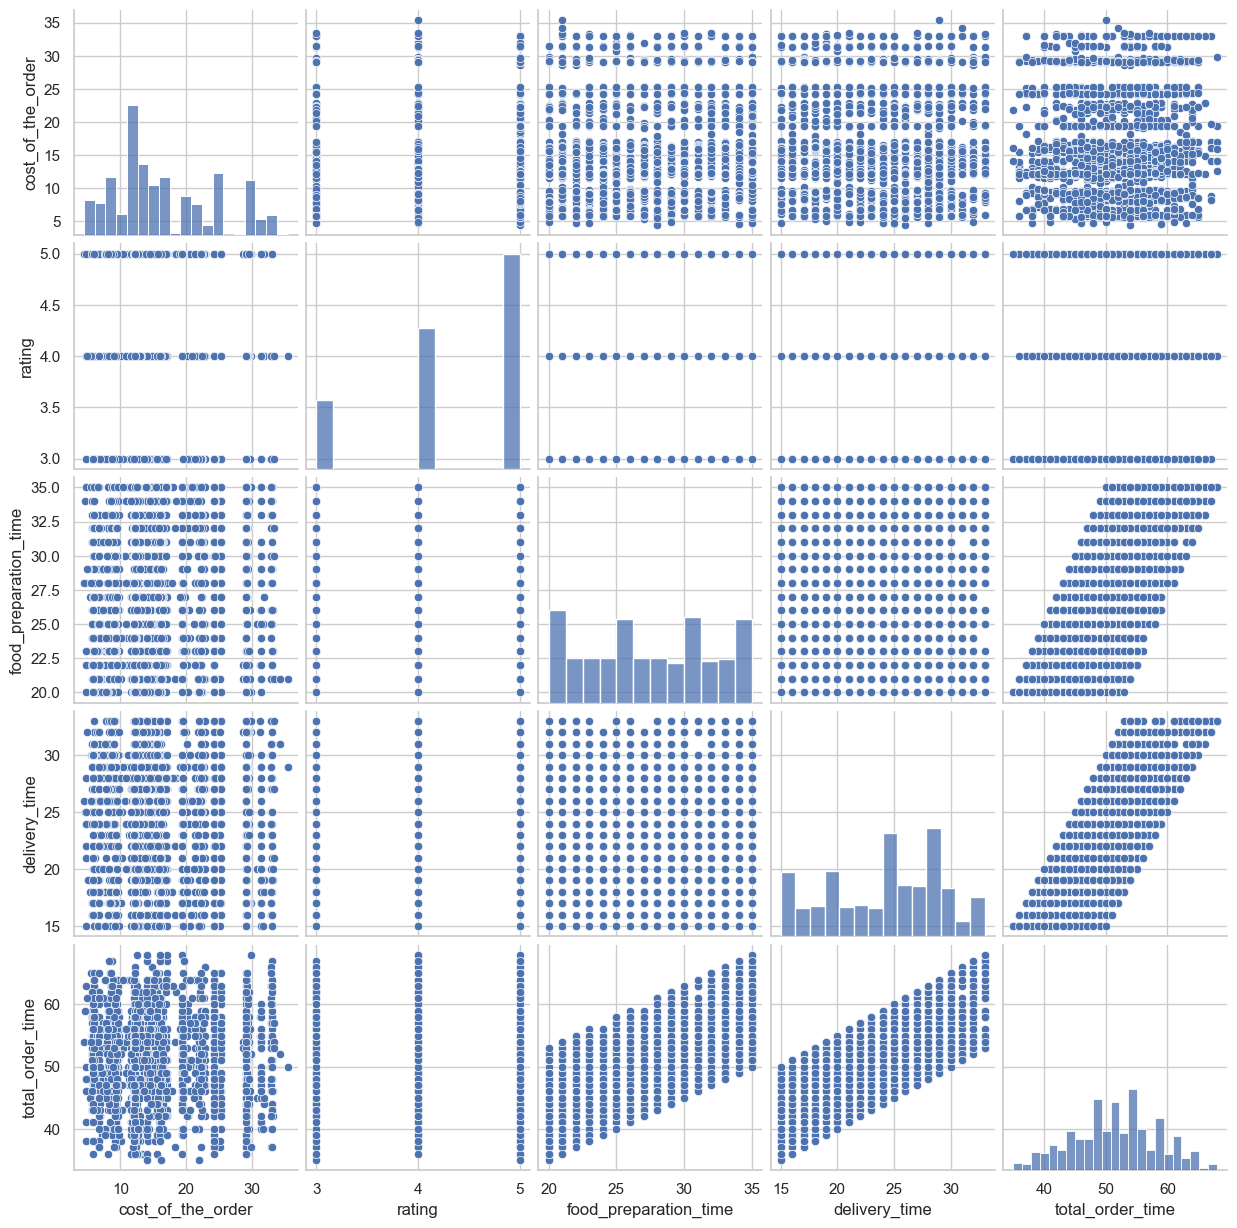

In [83]:
sns.pairplot(data = food_data[['cost_of_the_order','rating','food_preparation_time','delivery_time','total_order_time']]);

### Observation

The analysis indicates weak correlation among most of the columns in the data frame. Notably, the cost of an order does not correlate with its rating, possibly due to the high number of null ratings in the dataset (736). Dropping these rows may improve the correlation, but would result in losing 36% of the data. No significant correlations were observed among the other columns.

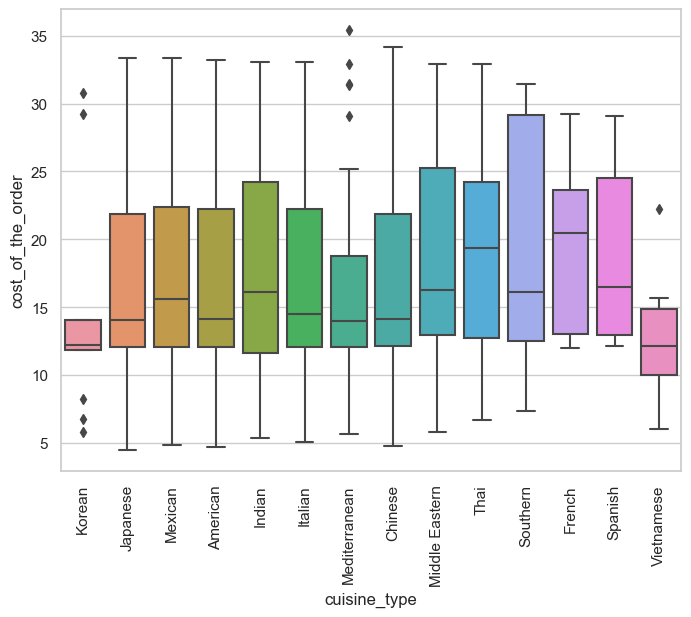

In [84]:
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=food_data)
plt.xticks(rotation=90);

The analysis reveals that Vietnamese cuisine is generally the least expensive, except for one outlier. In contrast, Mediterranean cuisine has the highest cost of orders. Korean cuisine has a few outliers on both ends of the spectrum.

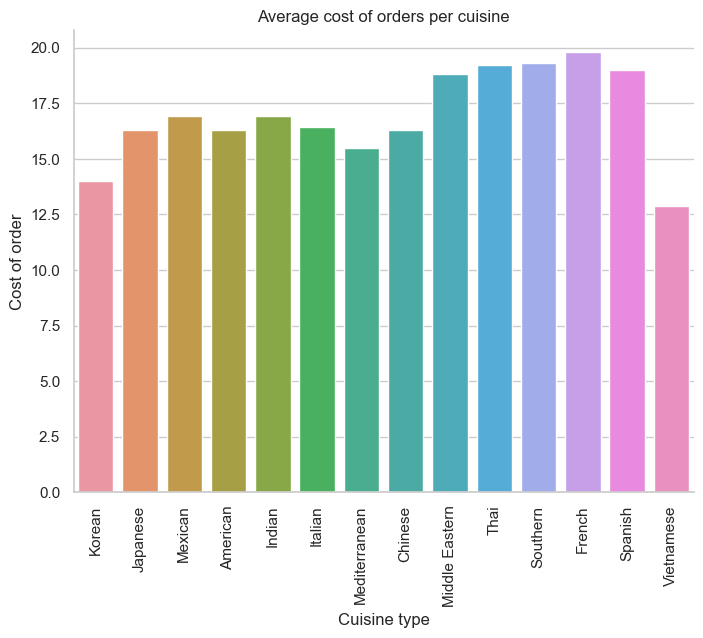

In [85]:
import seaborn as sns

sns.barplot(data=food_data, x='cuisine_type', y='cost_of_the_order',errorbar=('ci', False), errcolor='black')
sns.despine()
plt.xticks(rotation=90)
plt.xlabel('Cuisine type')
plt.ylabel('Cost of order')
plt.title('Average cost of orders per cuisine')
plt.show()


### Observation

Based on our analysis, Vietnamese cuisine has the lowest average cost of orders. On the other hand, French cuisine is the most expensive on average. Interestingly, the top 5 frequently ordered cuisines have similar costs. We also observe that the most expensive cuisines are less frequently ordered and rank lower on the list

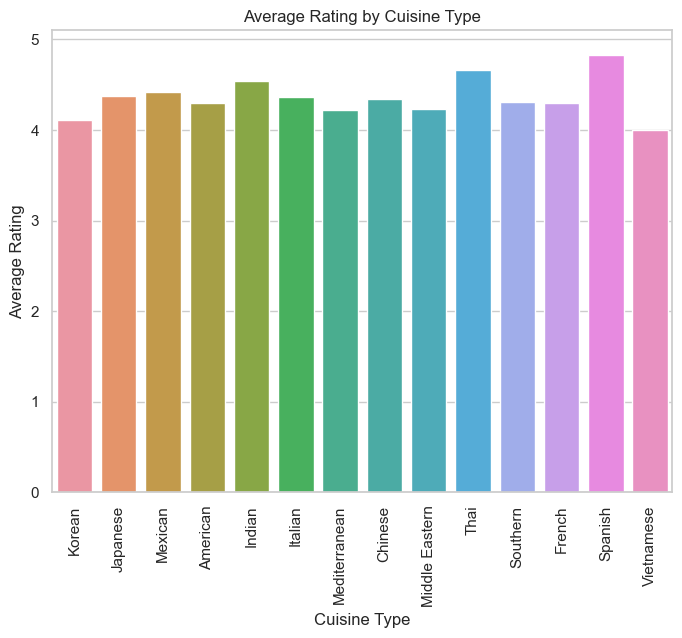

In [86]:
# Create a bar plot of cuisine types and their average rating
sns.barplot(data = food_data, x ='cuisine_type', y ='rating', errorbar=('ci', False))

# Rotate x-axis labels to be vertical for better readability
plt.xticks(rotation = 90)

# Set plot title and axis labels
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating');


The Spanish cuisine received the highest rating among all cuisines. It is worth noting that despite its high rating, the sales count is still relatively low (in the bottom 5), indicating that the rating and total order times may not have a significant effect on the number of orders. Nonetheless, Spanish cuisine has the highest average rating of 5.

On the other hand, Vietnamese cuisine has the lowest average cost but the least number of orders compared to other cuisines. Furthermore, it also has the lowest average rating and one of the highest total order times among all cuisines.

_Let's say the company is trying to reward their loyal customers/restaurants. To qualify for the promotional offer, restaurants must meet the following criteria: have a rating count of more than 50 and an average rating greater than 4. We need to find the restaurants that fulfill these criteria._

In [87]:
# Dropping the top level column 'rating' to access the aggregated columns more easily.

restaurants = food_data.groupby('restaurant_name')[['rating']].agg(['mean','sum','count'])
restaurants.columns = restaurants.columns.droplevel(0)

selected_restaurants = restaurants[(restaurants['mean'] > 4) & (restaurants['count'] > 50)]


In [88]:
selected_restaurants

,mean,sum,count
restaurant_name,,,
Blue Ribbon Fried Chicken,4.328125,277.0,64
Blue Ribbon Sushi,4.219178,308.0,73
Shake Shack,4.278195,569.0,133
The Meatball Shop,4.511905,379.0,84


These 4 restaurants are the qualified restaurant.

### How does the mean delivery time vary during weekdays and weekends?

In [89]:
# First, separate the 2 delivery times: weekday and weekend.
weekend_delivery = food_data.loc[food_data['day_of_the_week'] == 'Weekend', ['order_id', 'delivery_time']]

# Groupby order_id and calculate the sum of delivery times
weekend_delivery_sum = weekend_delivery.groupby('order_id').sum()

# Calculate the mean of the delivery times
average_delivery_time_weekend = weekend_delivery_sum.mean()

In [90]:
average_delivery_time_weekend

delivery_time    22.470022
dtype: float64

In [91]:
weekday_delivery = food_data[food_data['day_of_the_week'] == 'Weekday'][['order_id', 'delivery_time']]
average_delivery_time_weekday = weekday_delivery.groupby('order_id').sum().mean()

In [92]:
average_delivery_time_weekday

delivery_time    28.340037
dtype: float64

### Observation

On average, the delivery time during weekdays is higher compared to weekends. There could be several reasons for this, such as heavier traffic during weekdays, poor management of drivers or drivers having a poor attitude towards work.

## Conclusions

- Most of the orders cost between 12-23 dollars.

----------------------------------------------------------------------------------------------------------------------

- American cuisine is the most ordered type of food while vietnamese is the least ordered.

----------------------------------------------------------------------------------------------------------------------

- Nearly 40% of the orders in the dataset lack a rating. Spanish cuisine has the highest average rating, but the top 5 most frequently ordered cuisines do not consistently have the highest ratings.

----------------------------------------------------------------------------------------------------------------------

- Orders are more frequent on weekends than on weekdays, and they generally take longer to complete during the week. While preparation times are similar, deliveries are slower on weekdays, resulting in longer overall order times.

----------------------------------------------------------------------------------------------------------------------

- The data suggests a strong positive correlation between delivery time and total time, as well as between order preparation time and total time. An increase in order preparation time results in an increase in the total time, and an increase in delivery time leads to a longer total time.

----------------------------------------------------------------------------------------------------------------------

- The data frame does not show any significant correlations between most of its columns, with only a few weak positive and negative correlations observed.

----------------------------------------------------------------------------------------------------------------------

- While Vietnamese cuisine has the lowest average cost, it receives the least number of orders. Additionally, it has the lowest average ratings and one of the longest total order times



## Recommendation

- FoodHub should consider offering incentives for customers to leave ratings. For example, the company could offer a discount or free item for customers who leave a rating after their order is delivered. This would help increase the number of ratings and provide more insights into customer satisfaction.
----------------------------------------------------------------------------------------------------------------------

- The company should also provide incentives to drivers that makes the fastest delivery, and also reward restaurant with the highest rating.




----------------------------------------------------------------------------------------------------------------------

- Based on the analysis, it is suggested to consider discontinuing Vietnamese cuisine from the menu due to its low ratings, few orders and longer delivery times. Instead, the company can focus more on the cuisine types that have significantly higher order totals and can be easily improved to attract more customers, especially busy workers and students, and also consider using dynamic pricing on orders too.

----------------------------------------------------------------------------------------------------------------------

- To improve the growth of the company, it is recommended to incentivize customers to give ratings after their order is delivered. Offering a discount for rated orders or complimentary items after a certain number of reviews may encourage customers to give ratings. Additionally, separating ratings for the restaurant, food, and delivery service may provide more specific areas for improvement. This approach would allow the company to identify which restaurants or cuisine types to remove from their service, based on customer ratings. By separating the ratings, FoodHub can also find areas for improvement in their own company that are not related to the restaurant's meal preparation..

----------------------------------------------------------------------------------------------------------------------

- Orders are more taken by resturants in the weekend than the weekday, the company shouls consider this, and work on how to focus more and invest in the weekend business. Furthermore, it may be worth investigating the cause of longer delivery times during weekdays. This could be due to factors such as traffic or poor driver management. The company could consider employing more delivery personnel and grouping them by region to ensure faster delivery times.

----------------------------------------------------------------------------------------------------------------------

- I also recommend that the FoodHub should implement a customer feedback system, it could be through their social media platforms, website and other means. Additionally, the company should always have a budget for data-driven solutions in case of any problem that might arise in the future, something like machine learning solutions, data analytics solutions and so on. 

----------------------------------------------------------------------------------------------------------------------

- Explore ways to reduce the overall order time by minimizing the delivery time and order preparation time. This could include streamlining the ordering process, optimizing delivery routes, or reducing the time it takes to prepare orders.

----------------------------------------------------------------------------------------------------------------------

- Based on the data analysis, we recommend that the company focuses more on offering American, Japanese, Italian, Chinese, and Mexican cuisines, as they are the most commonly ordered cuisine types. This may involve introducing new menu items, partnering with popular restaurants that offer these cuisine types, or promoting these cuisine types more prominently on the platform. Additionally, the company could consider offering promotions or discounts on these cuisine types to attract even more customers. It may also be worth exploring ways to increase the visibility and popularity of less frequently ordered cuisine types, such as Vietnamese cuisine, through targeted marketing campaigns or partnerships with local restaurants that specialize in these cuisines.

----------------------------------------------------------------------------------------------------------------------

- Analyze the data further to identify other areas for improvement such as improving the quality of food or identifying the reasons why orders receive no ratings. This will help the company make data-driven decisions to improve its service and grow its business.

----------------------------------------------------------------------------------------------------------------------

- Lastly, the company could consider diversifying their cuisine offerings and focusing on the most popular cuisines with high ratings. They could also explore ways to improve the quality of Vietnamese cuisine and promote it to increase its popularity.

----------------------------------------------------------------------------------------------------------------------

- Overall, by implementing these recommendations, the company can improve user experience, customer satisfaction, increase order frequency, and ultimately drive growth.

----------------------------------------------------------------------------------------------------------------------


## Further Analysis - Machine Learning

We need to do some further data analysis, using machine learning provides valuable benefits such as predictive modeling, pattern discovery, optimization, automation, and continuous improvement. It helps us make accurate predictions, uncover hidden patterns, personalize experiences, optimize processes, and adapt to changing conditions. These capabilities enhance decision-making, improve business outcomes, and enhance customer experiences as the aim of FoodHub.

----------------------------------------------------------------------------------------------------------------------

There are several possible ways to apply machine learning algorithms to this analysis. One possible approach is to use a recommendation system to suggest restaurants to customers based on their past orders and ratings. Another approach is to use predictive modeling to forecast demand for different cuisines or restaurants. This could help FoodHub better plan their inventory and delivery resources, as well as optimize their pricing strategies. Another possible application of machine learning in this context is to use `Natural Language Processing (NLP)` techniques to analyze customer reviews and feedback. This could help FoodHub better understand customer preferences and improve their overall customer experience.

Finally, machine learning can also be used to optimize the delivery routes and schedules, which can help minimize the delivery time and cost while maximizing the number of orders delivered.


----------------------------------------------------------------------------------------------------------------------

Our first implementation would be getting top 5 most similar restaurant names using the `TfidfVectorizer and cosine_similarity` libraries available from the `Scikit-learn`

The second one will be using Linear Regression to predict the Mean Squared Error (MSE) value

These techniques uses the `Scikit-learn` library

----------------------------------------------------------------------------------------------------------------------

In [93]:
#Importing ML model tools needed for our prediction and optimization 

#Import the library for TfidfVectorizer & cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#Import the library for LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#It's a library used for transforming a multilabel classification problem into a binary classification problem
from sklearn.preprocessing import MultiLabelBinarizer

#It's a library used for handling missing values in a dataset
from sklearn.impute import SimpleImputer

#r2_score is a function from the sklearn.metrics module that calculates the R-squared score, 
#also known as the coefficient of determination
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix

#GridSearchCV is a class from the sklearn.model_selection module that performs an
#exhaustive search over specified parameter values for an estimator
from sklearn.model_selection import GridSearchCV


In [94]:
# Load the dataset
food_data = pd.read_csv("food_order.csv")

In [95]:
food_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [96]:
# Convert the cuisine_type column into a list of words for each row
#This helps to normalize our data, categorical encoding, filter, and query
food_data['cuisine_type'] = food_data['cuisine_type'].apply(lambda x: x.split(','))

In [97]:
# Vectorize the cuisine_type column using TF-IDF vectorizer. 
#This enables Vectorizing cuisine_type with TF-IDF(Term Frequency-Inverse Document Frequency) 
#enables numerical representation, feature extraction, dimensionality reduction, similarity calculation, 
#and model compatibility in analyzing textual data.

vectorizer = TfidfVectorizer(analyzer=lambda x: x)
vectors = vectorizer.fit_transform(food_data['cuisine_type'])

In [98]:
# Calculate cosine similarity between all restaurant vectors
cosine_similarities = cosine_similarity(vectors)

In [99]:
# Define a function to get the top n similar customer for a given customer
def get_similar_users(customer_id, n):
    similar_users = sorted(list(enumerate(user_sim[customer_id])), key=lambda x: x[1], reverse=True)
    return similar_users[1:n+1]

In [100]:
# Function to get recommendations for a given restaurant
def get_recommendations(restaurant_name, cosine_similarities=cosine_similarities):
    # Get the index of the restaurant with the given name
    idx = food_data[food_data['restaurant_name'] == restaurant_name].index[0]
    
    # Get the cosine similarities of all restaurants with the given restaurant
    sim_scores = list(enumerate(cosine_similarities[idx]))
    
    # Sort the restaurants based on cosine similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top 5 most similar restaurants
    sim_scores = sim_scores[1:6]
    
    # Get the indices of the top 5 most similar restaurants
    restaurant_indices = [i[0] for i in sim_scores]
    
    # Return the names of the top 5 most similar restaurants
    return food_data['restaurant_name'].iloc[restaurant_indices]

In [101]:
#Using one of the restaurant to predict other similar names, and note this changes everytime we use different
#restaurant names.

print(get_recommendations('Blue Ribbon Fried Chicken'))

4                Dirty Bird to Go
12      Blue Ribbon Fried Chicken
14         Lucky's Famous Burgers
15                    Shake Shack
20    Five Guys Burgers and Fries
Name: restaurant_name, dtype: object


This code uses the TF-IDF vectorizer from scikit-learn to vectorize the cuisine_type column, and then calculates cosine similarity between all restaurant vectors. The get_recommendations function takes a restaurant name as input, finds the cosine similarities between that restaurant's vector and all other restaurant vectors, and returns the top 5 most similar restaurant names.

----------------------------------------------------------------------------------------------------------------------

Another approach is to use predictive modeling to forecast demand for different cuisines or restaurants. This could help FoodHub better plan their inventory and delivery resources, as well as optimize their pricing strategies.

----------------------------------------------------------------------------------------------------------------------

To predict demand for different cuisines or restaurants, you can use various predictive modeling techniques such as regression, random forest, or gradient boosting. Here's an implementation of this using linear regression:

In [102]:
# Assuming you have a dataset with features and target variable
# X represents the features (e.g., cuisine_type, rating, and delivery_time.)
# y represents the target variable (e.g., cost_of_the_order)

In [103]:
# Select the features and target variable
features = ['cuisine_type', 'rating', 'delivery_time']
target = 'cost_of_the_order'

In [104]:
# Replace 'Not given' with NaN in the 'restaurant_rating' and 'delivery_time' columns
food_data['rating'] = food_data['rating'].replace('Not given', np.nan)
food_data['delivery_time'] = food_data['delivery_time'].replace('Not given', np.nan)

# Drop rows with missing values
#food_data = data.dropna(subset=['rating', 'delivery_time'])

In [105]:
# Split the data into features (X) and target variable (y)
X = food_data[features]
y = food_data[target]

In [106]:
# Apply MultiLabelBinarizer to encode the 'cuisine_type' column
mlb = MultiLabelBinarizer()
X_encoded = pd.DataFrame(mlb.fit_transform(X['cuisine_type']), columns=mlb.classes_)

In [107]:
# Concatenate the encoded features with the remaining numerical features
X_encoded = pd.concat([X_encoded, X[['rating', 'delivery_time']]], axis=1)

In [108]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

In this code, the SimpleImputer from scikit-learn is used to handle missing values. The imputer is applied to the encoded features using the strategy 'mean', which replaces the missing values with the mean value of the respective feature. This ensures that the input X_imputed does not contain any NaN values, allowing the LinearRegression model to be trained successfully.

In [109]:
# Verify the shapes of X_imputed and y
print("X_imputed shape:", X_imputed.shape)
print("y shape:", y.shape)

# Check if there are any missing values in X_imputed or y and handle them appropriately

# Ensure X_imputed and y have the same number of samples
#if X_imputed.shape[0] == y.shape[0]:
    # Split the data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
    #print("Data split successfully!")
#else:
    #print("Error: Inconsistent numbers of samples between X_imputed and y.")

X_imputed shape: (1898, 16)
y shape: (1898,)


In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [111]:
# Create and train the linear regression model
model = LinearRegression()
print(model.fit(X_train, y_train))

LinearRegression()


In [112]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#### Predicted and Actual Values to dataframe

In [113]:
#Predicted and Actual Values to dataframe
preandact = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
preandact

,Actual,Predicted
420,12.08,16.770125
613,16.49,16.036743
1181,15.57,16.822138
925,29.10,19.315895
429,16.15,19.166934
...,...,...
1057,12.18,16.434453
416,14.84,16.230173
141,9.56,16.913535
1001,24.20,16.620318


In [114]:
#Check the accuracy using the test data and display the result
r2 = r2_score(y_test, y_pred)
print("R2 Score: ", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)


R2 Score:  -0.020853419872099765
Mean Absolute Error:  6.110981137011115
Mean Squared Error:  53.0313618074494
Root Mean Squared Error:  7.282263508515014


The mean squared error (MSE) value is approximately 53.031. This indicates the average squared difference between the predicted order quantities and the actual order quantities in the test set.
It's important to note that the interpretation of the MSE value depends on the scale of the target variable. In this case, without further context, it's difficult to determine if the MSE of 53.031 is considered good or bad.

We can compare the MSE with alternative models or use domain knowledge to assess the performance of the model and determine if further improvements are needed.



#### Note
_According to Wikipedia, "The mean squared error or mean squared deviation of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss"_

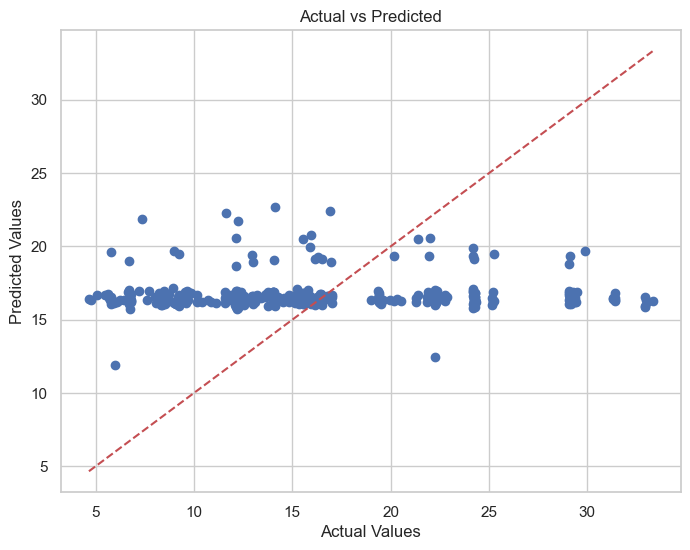

In [115]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


The graph represents the relationship between the actual values and the predicted values obtained from the linear regression model. Each point on the graph represents an observation from the test set.

Ideally, the points should fall close to the red dashed line, which represents a perfect match between the predicted and actual values. If the points are scattered around the line, it indicates that the model's predictions deviate from the actual values.

To further analyze the performance of the model, you can consider additional evaluation metrics such as R-squared (coefficient of determination), adjust the model hyperparameters, or try different machine learning algorithms to see if you can improve the predictive accuracy. Additionally, you may explore other techniques like feature engineering, feature selection, or regularization to enhance the model's performance.

In [116]:
# Define the hyperparameters to tune
param_grid = {'fit_intercept': [True, False]}

# Create the grid search object
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new linear regression model with the best hyperparameters
model = LinearRegression(**best_params)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score and best hyperparameters
print("R-squared score:", r2)
print("Best hyperparameters:", best_params)

R-squared score: -0.020853419872099765
Best hyperparameters: {'fit_intercept': True}


The code performs hyperparameter tuning for a Linear Regression model using GridSearchCV. It searches for the best combination of hyperparameters from the provided parameter grid. The model is then trained with the best hyperparameters on the training data. Finally, it makes predictions on the test data and calculates the R-squared score as an evaluation metric for model performance. The best hyperparameters and the R-squared score are printed as the output.

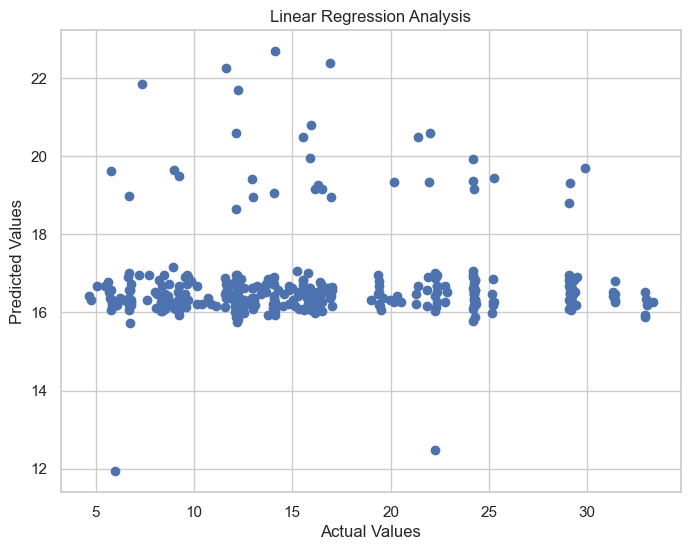

In [118]:
# Plot the actual values vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Analysis')
plt.show()


The scatter plot helps visualize how well the model's predictions align with the actual values. A closer alignment between the points and a diagonal line indicates a better prediction performance.